In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

# Data augmentation for training set

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

In [13]:
# Load the dataset
dataset_path = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet'

# training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training set
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation set
)

Found 822 images belonging to 20 classes.
Found 197 images belonging to 20 classes.


# Model layout

In [16]:
# Base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
    
# Unfreeze last 20 layers of the base model    
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Additional layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

# Add a fully connected layer with softmax activation
predictions = Dense(20, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [17]:
history = model.fit(train_generator, validation_data =validation_generator, epochs = 10)

Epoch 1/10
26/26 [==============================] - 37s 1s/step - loss: 2.5997 - accuracy: 0.5146 - val_loss: 0.6378 - val_accuracy: 0.7462
Epoch 2/10
26/26 [==============================] - 36s 1s/step - loss: 0.5074 - accuracy: 0.8212 - val_loss: 0.5481 - val_accuracy: 0.8020
Epoch 3/10
26/26 [==============================] - 33s 1s/step - loss: 0.4075 - accuracy: 0.8382 - val_loss: 0.4491 - val_accuracy: 0.8528
Epoch 4/10
26/26 [==============================] - 33s 1s/step - loss: 0.3080 - accuracy: 0.8881 - val_loss: 0.3283 - val_accuracy: 0.8629
Epoch 5/10
26/26 [==============================] - 33s 1s/step - loss: 0.2650 - accuracy: 0.8954 - val_loss: 0.4003 - val_accuracy: 0.8579
Epoch 6/10
26/26 [==============================] - 32s 1s/step - loss: 0.3030 - accuracy: 0.8783 - val_loss: 0.3827 - val_accuracy: 0.8477
Epoch 7/10
26/26 [==============================] - 32s 1s/step - loss: 0.2578 - accuracy: 0.9088 - val_loss: 0.3882 - val_accuracy: 0.8782
Epoch 8/10
26/26 [==

# Save the Model

In [18]:
model.save('C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Model/Our Dataset/InceptionV3_model02.keras')

<function matplotlib.pyplot.show(close=None, block=None)>

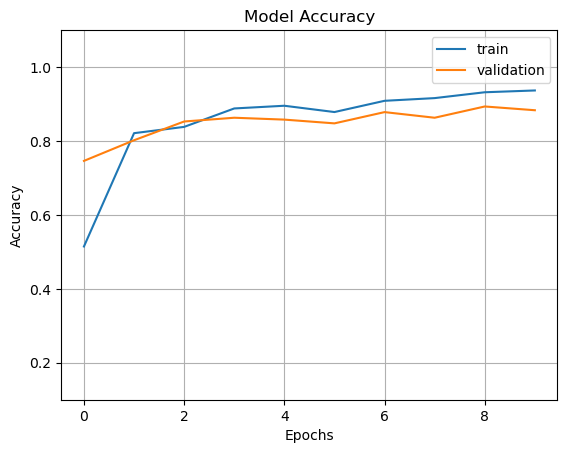

In [19]:
import matplotlib.pyplot as plt


fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1, ymax = 1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

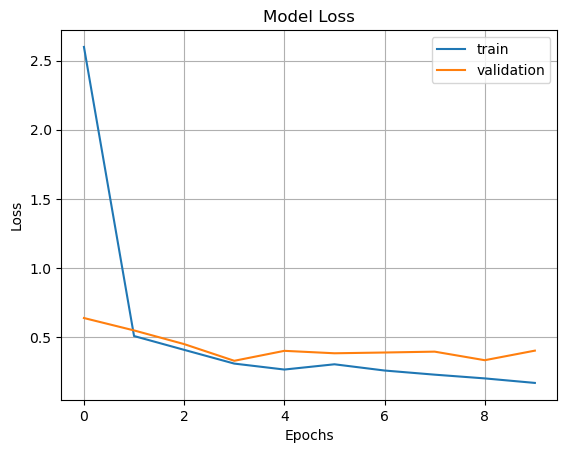

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

In [25]:
classes = {v:k for k,v in train_generator.class_indices.items()}

In [26]:
for i in range(20):
    print(f"'{classes[i]}',", end="")

'Adam_s Peak','Bentota Beach','Clock Tower Jaffna','Clock Tower Kandy','Colombo National Museum','Dematamal Viharaya','Galle Light House','Gampola Kingdom_s Ambuluwawa Tower','Hikkaduwa Beach','Lotus Tower','Maligawila Buddha Statue','Mirissa Beach','Negombo Beach','Nine Arch Bridge','Pidurangala Rock','Ranmasu Uyana','Ravana Falls','Ruwanwelisaya','Sigiriya Rock','Thuparamaya Dagaba',